<a href="https://colab.research.google.com/github/SOBIKA-G/Milk-Quality-Prediction/blob/main/Milk_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MILK QUALITY PREDICTION



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('/content/drive/MyDrive/milknew.csv')

In [72]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [73]:
data.isna().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [74]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['Grade'] = l.fit_transform(data['Grade'])

In [75]:
data.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


<Axes: >

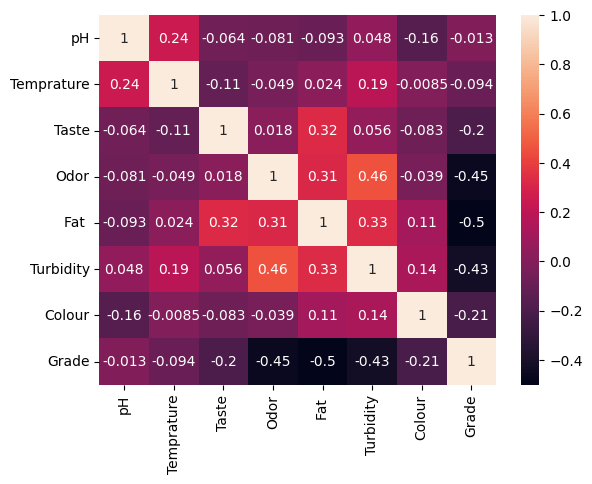

In [76]:
import seaborn as sns
sns.heatmap(data.corr(),annot = True)

In [77]:
X = data.drop('Grade',axis=1)
y = data.Grade

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state = 32)

In [79]:
print(x_train.shape,y_train.shape)

(211, 7) (211,)


In [80]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report


# **Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred = lr.predict(x_test)

In [83]:
print("Confusion matix for Logistic Regression : \n",confusion_matrix(y_test,y_pred))

Confusion matix for Logistic Regression : 
 [[130  27  46]
 [ 52 243  55]
 [ 10   5 280]]


In [99]:
print("Accuracy Score of logistic regression : ",accuracy_score(y_test,y_pred))

Accuracy Score of logistic regression :  0.7700471698113207


In [84]:
print("CLassification Report for Logistic Regression : \n",classification_report(y_test,y_pred))

CLassification Report for Logistic Regression : 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       203
           1       0.88      0.69      0.78       350
           2       0.73      0.95      0.83       295

    accuracy                           0.77       848
   macro avg       0.77      0.76      0.75       848
weighted avg       0.78      0.77      0.77       848



<Axes: >

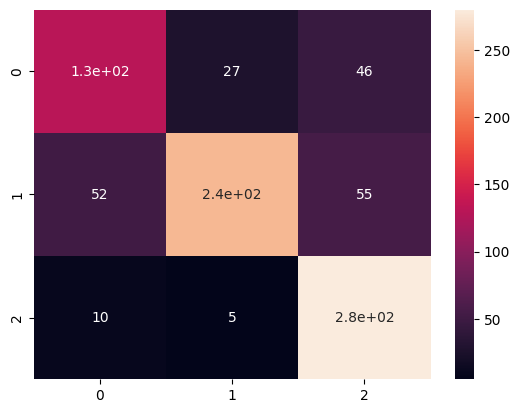

In [85]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# **Random Forest Classifier**

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
rpred = rf.predict(x_test)

In [88]:
print("Accuracy score Random Forest Classifier: ",accuracy_score(y_test,rpred))

Accuracy score Random Forest Classifier:  0.9976415094339622


In [89]:
pred = rf.predict(x_test)
print("Confusion matix for Random Forest Classifier : \n",confusion_matrix(y_test,rpred))

Confusion matix for Random Forest Classifier : 
 [[202   0   1]
 [  0 349   1]
 [  0   0 295]]


In [90]:
print("Classification Report for Random Forest Classifier : \n", classification_report(y_test,rpred))

Classification Report for Random Forest Classifier : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       350
           2       0.99      1.00      1.00       295

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848



<Axes: >

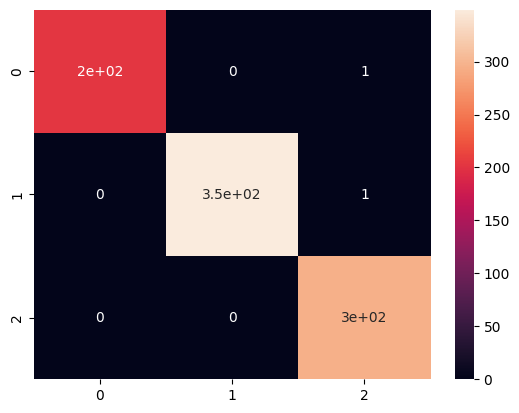

In [91]:
sns.heatmap(confusion_matrix(y_test,rpred),annot=True)

# **K Nearest Neighbours Classifier**

In [92]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(x_train,y_train)


KNeighborsClassifier()

In [93]:
kpred = kc.predict(x_test)
print("Confusion Matrix for KNN Classifier: \n",confusion_matrix(y_test,kpred))

Confusion Matrix for KNN Classifier: 
 [[196   0   7]
 [  1 331  18]
 [ 32   0 263]]


In [94]:
print("Accuracy score for K Nearest Classifier: ",accuracy_score(y_test,kpred))

Accuracy score for K Nearest Classifier:  0.9316037735849056


# **Gradio Interface**

In [95]:
pip install gradio

In [96]:
import gradio as gr

In [97]:
def predict_grade(pH, Temperature, Taste, Odor, Fat, Turbidity, Colour):
    sample = [[pH, Temperature, Taste, Odor, Fat, Turbidity, Colour]]
    prediction = rf.predict(sample)
    return f"The predicted grade is: {prediction[0]}"

# Enhanced Gradio Interface with CSS
with gr.Blocks(css="""
    .gr-container {
        background-color: #f0f0f0; /* Light Grey background */
        border-radius: 10px;
        padding: 40px;
        box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
    }
    .gr-title {
        color: #333333; /* Dark Grey title */
        text-align: center;
        margin-bottom: 30px;
    }
    .gr-button {
        background-color: #4CAF50; /* Green button */
        color: white;
        border-radius: 5px;
        padding: 10px 20px;
        margin-top: 20px;
    }
    .gr-button:hover {
        background-color: #45a049; /* Darker Green on hover */
    }
    .gr-input-container {
        border-radius: 5px;
        padding: 15px;
        background-color: #f9f9f9; /* Light Grey input boxes */
        margin-bottom: 15px;
    }
""") as interface:
    gr.Markdown("# 🥛 Milk Quality Prediction", elem_id="title")
    gr.Markdown("Enter the characteristics of the milk sample to predict its grade. 🌟", elem_id="description")

    with gr.Row():
        with gr.Column(scale=0.5):
            pH = gr.Number(label="pH", elem_id="ph_input")
            Temperature = gr.Number(label="Temperature", elem_id="temp_input")
            Taste = gr.Radio([0, 1], label="Taste (0: No, 1: Yes)", elem_id="taste_input")
            Odor = gr.Radio([0, 1], label="Odor (0: No, 1: Yes)", elem_id="odor_input")
        with gr.Column(scale=0.5):
            Fat = gr.Radio([0, 1], label="Fat (0: No, 1: Yes)", elem_id="fat_input")
            Turbidity = gr.Radio([0, 1], label="Turbidity (0: No, 1: Yes)", elem_id="turbidity_input")
            Colour = gr.Slider(0, 255, step=1, label="Colour", elem_id="colour_input")

    prediction_output = gr.Textbox(label="Prediction", elem_id="prediction_box")
    flag_button = gr.Button("Flag")

    # Prediction Functionality
    predict_button = gr.Button("Predict")
    predict_button.click(
        predict_grade,
        inputs=[pH, Temperature, Taste, Odor, Fat, Turbidity, Colour],
        outputs=[prediction_output]
    )

# Launch the Interface
interface.launch()

/usr/local/lib/python3.11/dist-packages/gradio/layouts/column.py:55: UserWarning: 'scale' value should be an integer. Using 0.5 will cause issues.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://099d8281610d4f243f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
